In [4]:
# Here we will first import the following libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [12]:
dataurl= "http://bit.ly/w-data"


In [13]:

student_data = pd.read_csv(dataurl)

In [14]:
student_data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [15]:
student_data.shape

(25, 2)

In [16]:
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [17]:
# What are the features?

# Hours:The no. of hours a student spend in studying


# What is the response?

# Scores: The Scores of a student in percentages

# What else do we know?

# Because the response variable is continuous, this is a regression problem.
# There are 25 observations (represented by the rows),and  2 columns where Hours represents a predictor column and Scores
# represents a dependent variable.

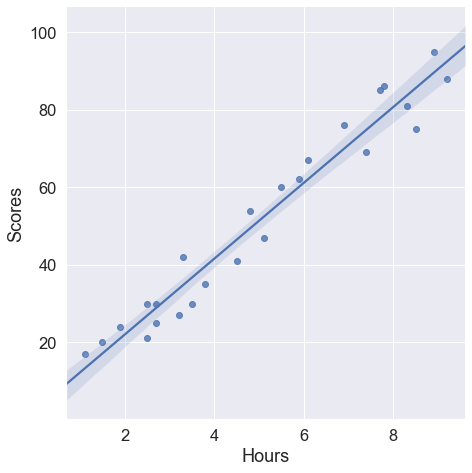

In [20]:
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# visualize the relationship between the features and the response using scatterplots
sns.pairplot(student_data, 
             x_vars=['Hours'], 
             y_vars='Scores', 
             height=7, 
             aspect=1, 
             kind='reg');

In [21]:
student_data.sample(5)

,Hours,Scores
17,1.9,24
11,5.9,62
19,7.4,69
14,1.1,17
8,8.3,81


In [22]:
# create a Python list of feature names
feature_col = ['Hours']

# use the list to select a subset of the original DataFrame
X = student_data[feature_col]

# select a Series from the DataFrame
y = student_data['Scores']

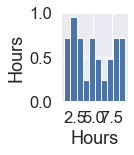

In [23]:
sns.pairplot( X);

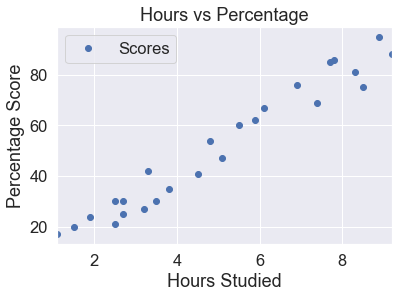

In [24]:
# Plotting the distribution of scores
student_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [26]:
student_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


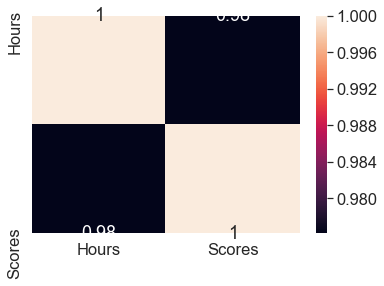

In [37]:
sns.heatmap( student_data.corr(), annot=True );

In [38]:
# Splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

In [39]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(17, 1)
(17,)
(8, 1)
(8,)


In [40]:
# import the ML algorithm
from sklearn.linear_model import LinearRegression
#from pandas.core import datetools
# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# fit the model to the training data (learn the coefficients)
#linreg_sm = smdl.OLS(y_train, X_train).fit()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
# return beta coeff
#Interpreting Model Coefficients
#How do you interpret the Hours coefficient ( 𝛽1 )?

#An increase in Hours is associated with a 10.41075981  increase in Percentage achieved by student.
#Note that if an increase in Hours studies was associated with a decrease in Percentage achieved by student, 
#𝛽1  would be negative.

linreg.coef_

array([10.41075981])

In [42]:

linreg.intercept_

-1.5123061161277818

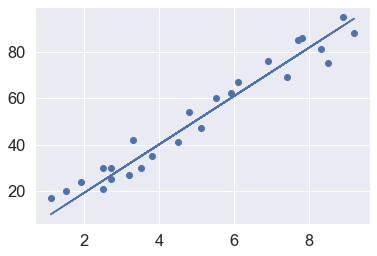

In [44]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [45]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

    Hours
14    1.1
13    3.3
17    1.9
3     8.5
21    4.8
10    7.7
18    6.1
19    7.4


In [46]:
# Comparing Actual vs Predicted
studentdf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
studentdf 

,Actual,Predicted
14,17,9.939530
13,42,32.843201
17,24,18.268138
3,75,86.979152
21,54,48.459341
10,85,78.650544
18,67,61.993329
19,69,75.527316


In [49]:
# You can also test with your own data
# manually calculate the prediction
-1.5123061161277818 + 10.41075981*9.25

94.78722212637223

In [50]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'Hours': [9.25]})
X_new.head()

,Hours
0,9.25


In [51]:
linreg.predict(X_new)

array([94.78722213])

In [53]:
from statsmodels.tools.eval_measures import rmse

# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import libraries for metrics and reporting

from sklearn import metrics

# Model evaluation metrics for regression

print('y-intercept             : ', linreg.intercept_)
print('beta coefficients       : ', linreg.coef_)
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('r2 value                : ', metrics.r2_score(y_test, y_pred))

y-intercept             :  -1.5123061161277818
beta coefficients       :  [10.41075981]
Mean Abs Error   MAE    :  7.169048271425506
Mean Sq  Error MSE      :  56.09233090564668
Root Mean Sq Error RMSE :  7.489481350911202
r2 value                :  0.8933827573294114
